In [1]:
import os
import sys
import numpy as np
from numpy.linalg import inv
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
#Path to regression data
polreg_loc = os.path.join(os.getcwd(), 'data', 'regression_part2.csv')

#Creates DataFrame
dataSet = pd.read_csv(polreg_loc)
print(dataSet)

    input  output
0   2.728   9.088
1   3.244  12.786
2  -4.164 -10.016
3   4.875  32.976
4   3.329  10.437
5   4.268  21.681
6  -2.879  -5.204
7  -2.276  -1.465
8   2.688   8.539
9   2.780   6.929
10  3.874  15.765
11 -4.826 -15.577
12  2.633  11.382
13  2.815   9.853
14  4.441  24.914
15  1.345   3.977
16 -4.616 -15.291
17  1.405  -0.154
18 -2.588  -0.988
19  0.992  -1.133
20  3.276  10.743
21 -0.597   0.536
22 -3.772  -6.342
23 -2.848  -1.673
24  4.310  25.919


In [3]:
inpt = dataSet['input'].values.reshape(len(dataSet['input'].values), 1)



y = dataSet['output'].values.reshape(len(inpt), 1)

min(inpt),max(inpt)

(array([-4.826]), array([4.875]))

[3.07542413 3.46412862]
[-1.26620028  3.46985973  0.39506553]
[0.4053055  0.48562415 0.31115341 0.19142221]
[ 0.24292578  0.48100068  0.35212378  0.19152571 -0.00169485]


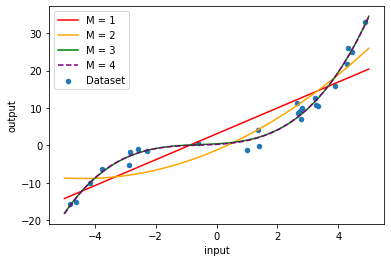

In [4]:
#Plot that data set
dataSet.plot(x = 'input', y = 'output', kind = 'scatter', label = 'Dataset')

pee = ['red','orange','green','purple']

MSE = []

for i in [1,2,3,4]: 
    #To what degree will we be fitting our data.
    polyReg = PolynomialFeatures(degree = i, include_bias = False)
    poly_x = polyReg.fit_transform(inpt)

    #Add bias
    designMatrix = np.append(np.ones([len(inpt), 1]), poly_x, axis = 1)

    #Fit optimal weights
    reg = LinearRegression(fit_intercept= False)
    reg.fit(designMatrix, y)
    
    MSE.append(mean_squared_error(y, reg.predict(designMatrix)))

    #Create X and Y co-ordinates for plotting
    weights = reg.coef_[0]
    print(weights)
    X = np.linspace(-5,5,100)
    
    #Quite a un-cool little for loop for calculating Y if you ask me 
    if (i == 1):
        Y = X*weights[1] + weights[0]
    elif(i == 2):
        Y = np.power(X, 2)*weights[2] + X*weights[1] + weights[0]
    elif(i == 3):
        Y = np.power(X, 3)*weights[3] + np.power(X,2)*weights[2] + X*weights[1] + weights[0]
    elif(i == 4):
        Y = np.power(X, 4)*weights[4] + np.power(X, 3)*weights[3] + np.power(X,2)*weights[2] + X*weights[1] + weights[0]
        
        plt.plot(X,Y,color = pee[i-1], label = 'M = ' + str(i), linestyle = '--')
        plt.legend()
            
        continue
        
    #Plot our results
    plt.plot(X,Y,color = pee[i-1], label = 'M = ' + str(i))
    plt.legend()
    
    

<Figure size 432x288 with 0 Axes>

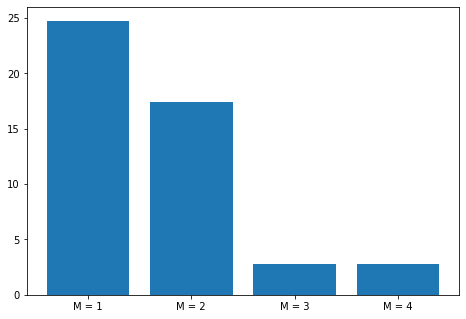

In [5]:
plt.figure()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
degrees = ['M = 1', 'M = 2', 'M = 3', 'M = 4']
MSE2 = [MSE[0],MSE[1],MSE[2],MSE[3]]
ax.bar(degrees,MSE2)
plt.show()

In [6]:
Y2 = weights[0] + weights[1]*rbf(c[0],alpha[1],X) + weights[2]*rbf(c[1],alpha[1],X) + weights[3]*rbf(c[2],alpha[1],X) + weights[4]*rbf(c[3],alpha[1],X)
Y3 = weights[0] + weights[1]*rbf(c[0],alpha[2],X) + weights[2]*rbf(c[1],alpha[2],X) + weights[3]*rbf(c[2],alpha[2],X) + weights[4]*rbf(c[3],alpha[2],X)

NameError: name 'rbf' is not defined

In [12]:
def rbf(center, alpha, x):
    return np.exp(-0.5*(x-center)**2/alpha**2)

In [13]:
c = np.array([-4.0,-2.0,2.0,4.0])
alpha = np.array([0.2,100,1000])
designMatrix = np.ones((len(inpt),1))
appender = np.ones((len(inpt),1))

#Column vectors for alpha 0.2
rbf1 = rbf(c[0],alpha[0],inpt)
rbf2 = rbf(c[1],alpha[0],inpt)
rbf3 = rbf(c[2],alpha[0],inpt)
rbf4 = rbf(c[3],alpha[0],inpt)

#Column vectors for alpha 100
rbf1a100 = rbf(c[0],alpha[1],inpt)
rbf2a100 = rbf(c[1],alpha[1],inpt)
rbf3a100 = rbf(c[2],alpha[1],inpt)
rbf4a100 = rbf(c[3],alpha[1],inpt)

#Column vector for alpha 1000
rbf1a1000 = rbf(c[0],alpha[2],inpt)
rbf2a1000 = rbf(c[1],alpha[2],inpt)
rbf3a1000 = rbf(c[2],alpha[2],inpt)
rbf4a1000 = rbf(c[3],alpha[2],inpt)

phi1 = np.append(np.ones((len(inpt),1)), np.concatenate((rbf1,rbf2,rbf3,rbf4),axis=1),axis=1)
phi2 = np.append(np.ones((len(inpt),1)), np.concatenate((rbf1a100,rbf2a100,rbf3a100,rbf4a100),axis=1),axis=1)
phi3 = np.append(np.ones((len(inpt),1)), np.concatenate((rbf1a1000,rbf2a1000,rbf3a1000,rbf4a1000),axis=1),axis=1)
#for center in c:
#    for i in range(len(inpt)):
#        appender[i] = rbf(center,alpha[0],inpt[i])
#    designMatrix = np.append(designMatrix, appender, axis = 1)
#    
#designMatrix 1
mentalReg = LinearRegression(fit_intercept = False)
mentalReg.fit(phi1, y)

#designMatrix2
mentalReg2 = LinearRegression(fit_intercept = False)
mentalReg2.fit(phi2, y)

#designMatrix3
mentalReg3 = LinearRegression(fit_intercept = False)
mentalReg3.fit(phi3, y)

#Weights
weights = mentalReg.coef_[0]
weights

#Weights 2
weights2 = mentalReg2.coef_[0]

#Weights3
weights3 = mentalReg3.coef_[0]

Y = weights[0] + weights[1]*rbf(c[0],alpha[0],X) + weights[2]*rbf(c[1],alpha[0],X) + weights[3]*rbf(c[2],alpha[0],X) + weights[4]*rbf(c[3],alpha[0],X)
Y2 = weights2[0] + weights2[1]*rbf(c[0],alpha[1],X) + weights2[2]*rbf(c[1],alpha[1],X) + weights2[3]*rbf(c[2],alpha[1],X) + weights2[4]*rbf(c[3],alpha[1],X)
Y3 = weights3[0] + weights3[1]*rbf(c[0],alpha[2],X) + weights3[2]*rbf(c[1],alpha[2],X) + weights3[3]*rbf(c[2],alpha[2],X) + weights3[4]*rbf(c[3],alpha[2],X)

In [14]:
X = np.linspace(-5,5,1000)

[]

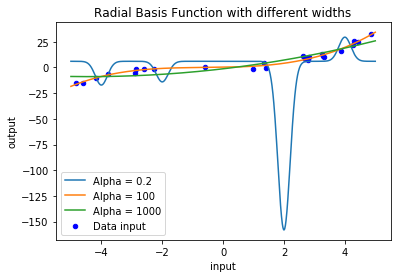

In [20]:
dataSet.plot(x = 'input', y = 'output', kind = 'scatter', label = 'Data input', color='blue')
plt.plot(X,Y,label='Alpha = 0.2')
plt.plot(X,Y2,label='Alpha = 100')
plt.plot(X,Y3,label='Alpha = 1000')
plt.title('Radial Basis Function with different widths')
plt.legend()
plt.plot()